# 이미지 전처리 관련 작업 학습

mnist, cifar-10과 같은 텐서플로우가 제공하는 데이터는 이미 전처리가 완벽하게 진행된 데이터들이다. 하지만 실제 사용하는 데이터의 경우, 많은 전처리가 필요했다. 

1. 실제 데이터를 바로 사용하게되면, 전처리 과정이 수행되지 않았기 때문에 데이터의 일관적인 '특징'을 찾기가 어렵다.


2. 오버피팅을 피하는 방법의 하나로서 data augmentation을 수행합니다.

    데이터의 수집이 어려운 경우, 해당 데이터만 가지고 학습을 진행해야하므로, 반복의 횟수를 늘려서 학습을 진행한다. 이러한 경우, 오버피팅이 발생할 수 있다. 그래서 기존 이미지에 약간의 변형들을 주어서 마치 새로운 이미지를 학습하는 것과 같은 효과를 주기위해 이미지 전처리로 data argmentation를 수행합니다.
    
    
이미지에 대한 변형, 변환의 여러가지 이미지를 다루는 방법에 대해서 학습해보도록 하자.



# PIL

python image library로, 이미지를 다루기 위한 기초적인 라이브러리

이미지를 행렬로 다루기 때문에 이미지의 좌표가 좌상부터 (0,0)입니다. 


In [1]:
# 이미지 불러오기

from PIL import Image

image = Image.open('./dataset/pets/Cat/4.jpg')

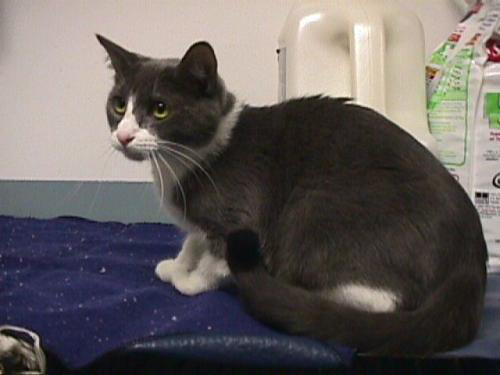

In [2]:
image

In [4]:
# 해당 이미지의 사이즈
image.size

(500, 375)

In [5]:
# 채널이 3개인 컬러 이미지
image.mode 

'RGB'

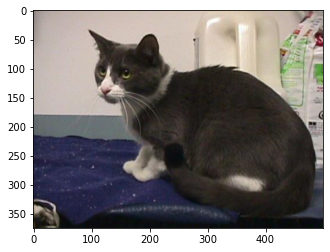

In [6]:
import matplotlib.pyplot as plt

plt.imshow(image)

## crop

기준 이미지에서 우리가 원하는 좌표만큼 잘라내는 함수

`.crop()`를 사용하고, 필요한 인자는 배열형태이다.

인자로 [left, upper, right, lower]이 제공되어야 한다.

In [14]:
point = [100, 100, 200, 200]

cropped_image = image.crop(point)

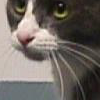

In [15]:
cropped_image

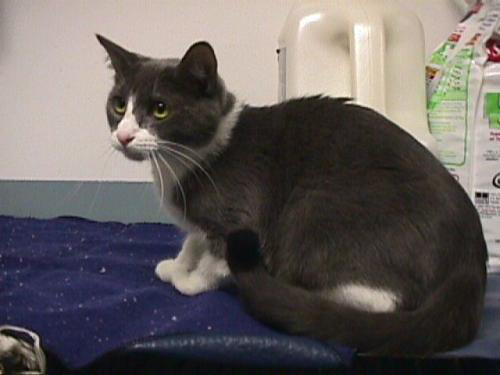

In [13]:
image

## paste

해당 이미지를 기존 이미지에 어느 지점을 기준으로 붙일 것인가? 

`.paste()`를 사용하고, 필요한 인자는 배열형태이다.

인자로 [left, upper, right, lower]이 제공되어야 한다.

- 인자로 사용할 point는 반드시 붙일 이미지의 크기와 동일해야한다.

In [16]:
image.paste(cropped_image, (0, 0, 100, 100))

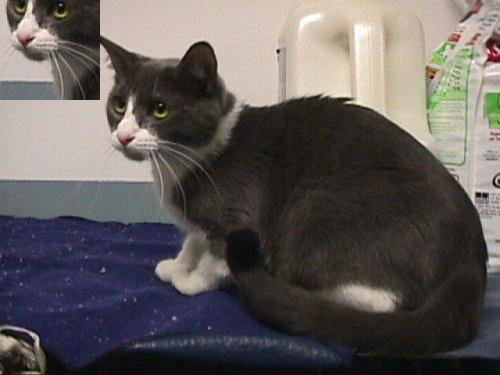

In [17]:
image

## transpose

좌우, 상하반전, 회전변환(90, 180, 270)등이 있다.

PIL에서 정해진 각도만 수행할 수 있다.


## rotate

각도를 설정하여 회전변환을 수행할 수 있다.

- transpose와 동일한 회전변환을 수행함에도 기존 이미지의 shape가 보존된다.


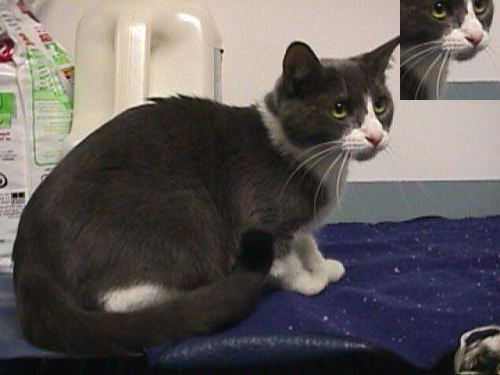

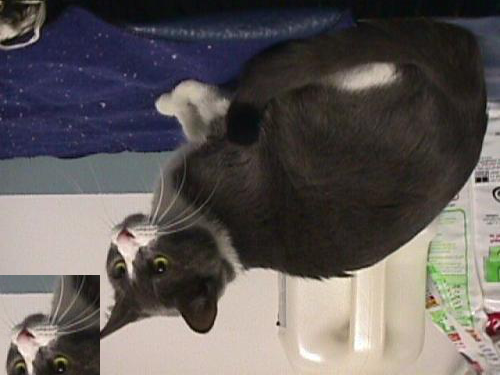

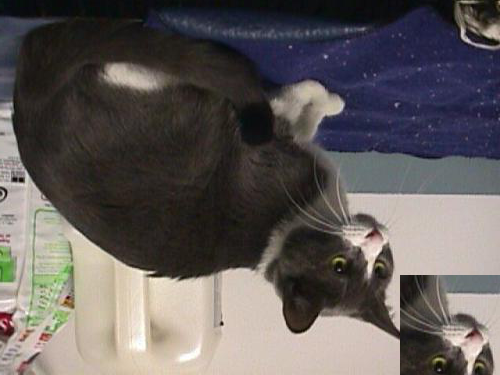

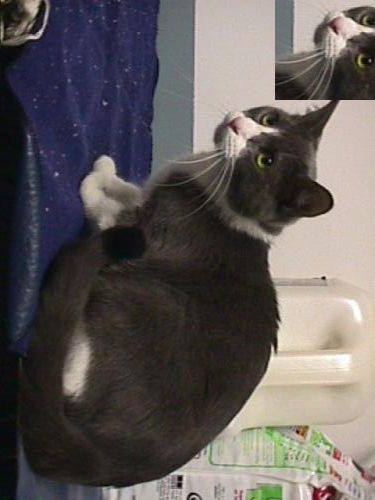

(375, 500)


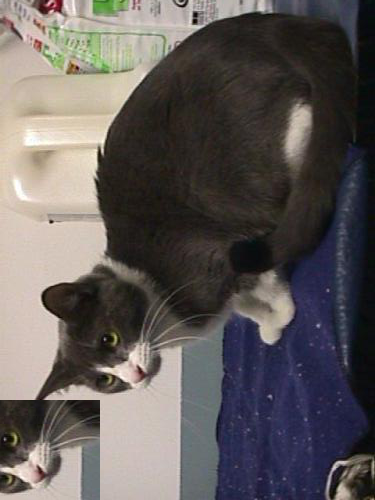

In [20]:
lr_image = image.transpose(Image.FLIP_LEFT_RIGHT)

display(lr_image)

tb_image = image.transpose(Image.FLIP_TOP_BOTTOM)

display(tb_image)

r1_image = image.transpose(Image.ROTATE_180)

display(r1_image)

r2_image = image.transpose(Image.ROTATE_270)

display(r2_image)
print(r2_image.size)

r3_image = image.transpose(Image.ROTATE_90)

display(r3_image)

(500, 375)


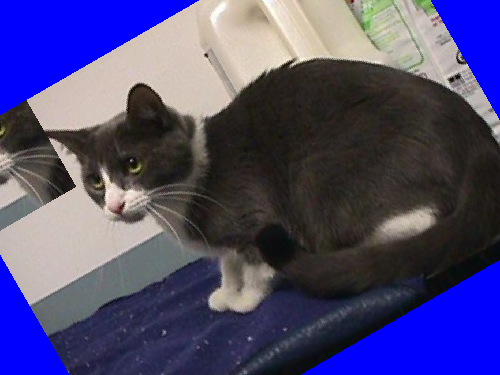

In [25]:

new_image = image.rotate(30, fillcolor = 'blue')

print(new_image.size)
display(new_image)

(500, 375)


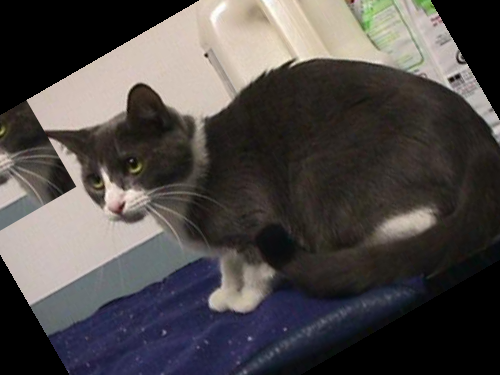

In [29]:
# 변환 후, 남겨지는 픽셀 값을 어떠한 값으로 사용할 것인가에 대해 resample
new_image = image.rotate(30, resample = Image.BILINEAR)

print(new_image.size)
display(new_image)

## resize


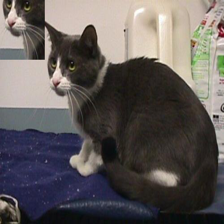

In [30]:
image.resize((224, 224))

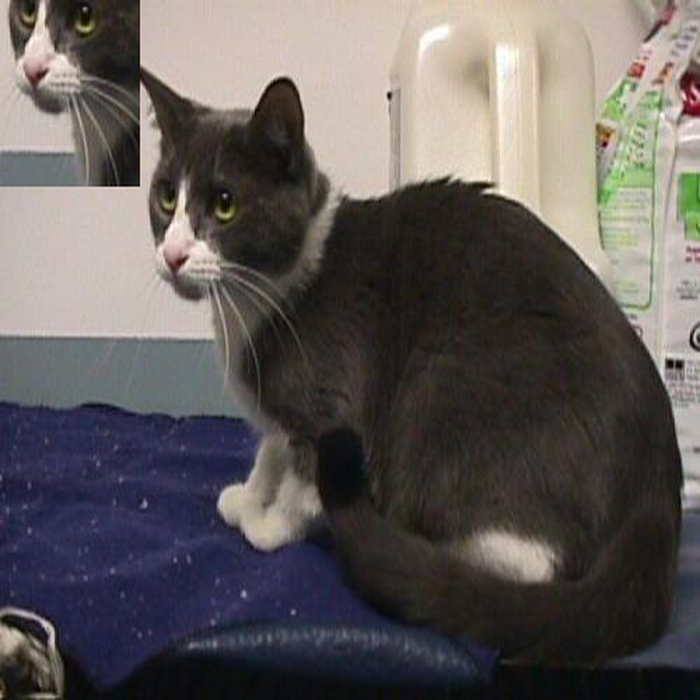

In [33]:
image.resize((700, 700), resample = Image.NEAREST)

image.resize((700, 700), resample = Image.LANCZOS)

# Image transform (변환)

# OpenCV로 가능한 것?

- 얼굴 및 물체 인식류도 이미 가능합니다.

In [35]:
import cv2

# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 이미지 불러오기
img = cv2.imread('./dataset/face_test2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # 눈 찾기
    roi_color = img[y:y + h, x:x + w]
    roi_gray = gray[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# 영상 출력
cv2.imshow('image', img)

key = cv2.waitKey(0)
cv2.destroyAllWindows()